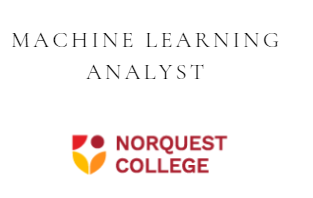

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

Before performing any data analysis and exploratory data analysis (EDA), we need to clean and preprocess the dataset. The dataset contains some columns with similar information and others that may not be relevant for analysis. We'll first clean the dataset and then perform EDA.

Here are the steps we'll follow:

**Data Cleaning:**

Remove duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:

# # Load the dataset (replace with your actual dataset)
# data = pd.read_csv('Proposed Data Collection.csv')

In [ ]:
# Load the dataset with a specified encoding
data = pd.read_csv('Cleaned Proposed Data Collection.csv', encoding='latin1')



In [ ]:
data.head()

,Timestamp,Drop Off Location,Stake,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Did you complete more than 1 route?,Ward/Branch,Comments,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,time completed,Route Number/Name
0,9-23-2023 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1.0,3.0,14.0,No,Clareview Ward,NaN,NaN,14,10:00:00 AM,10:25:00 AM,25.0,NaN
1,9-23-2023 10:36:52,Gateway Stake Centre,Gateway Stake,3.0,1.0,18.0,Yes,Crawford Plains Ward,NaN,2,144,10:00:00 AM,10:30:00 AM,30.0,NaN
2,9-23-2023 10:40:22,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,No,Silver Berry Ward,NaN,NaN,186,10:00:00 AM,10:30:00 AM,30.0,NaN
3,9-23-2023 10:41:08,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,Yes,Crawford Plains Ward,NaN,1,NaN,10:00:00 AM,10:30:00 AM,30.0,NaN
4,9-23-2023 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1.0,0.0,2.0,No,Londonderry Ward,NaN,NaN,1,NaN,NaN,10.0,NaN


In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            454 non-null    object 
 1   Drop Off Location                    454 non-null    object 
 2   Stake                                454 non-null    object 
 3   # of Adult Volunteers in this route  454 non-null    float64
 4   # of Youth Volunteers in this route  454 non-null    float64
 5   # of Donation Bags Collected/Route   454 non-null    float64
 6   Did you complete more than 1 route?  454 non-null    object 
 7   Ward/Branch                          452 non-null    object 
 8   Comments                             114 non-null    object 
 9   Number of routes completed           154 non-null    object 
 10  # of Doors in Route                  433 non-null    object 
 11  The time you started at:        

Ward/Branch had multiple columns, edit and add all to one column

In [ ]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
#data = data.drop(columns=['City','Email address','Email Address', 'Ward/Branch.1', 'Ward/Branch.2', 'Ward/Branch.3', 'Ward/Branch.4', 'Ward/Branch.5', 'Ward/Branch.6','Ward/Branch.7', 'Comments','Route Number/Name'])
"Already removed them during Data Cleaning"

'Already removed them during Data Cleaning'

In [ ]:
#Dropping Ward only to demos=nstrate rest of the tasks. Students are expected to update this column and leave it in

#data = data.drop(columns=['Ward/Branch'])

In [ ]:
data.head()

,Timestamp,Drop Off Location,Stake,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Did you complete more than 1 route?,Ward/Branch,Comments,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,time completed,Route Number/Name
0,9-23-2023 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1.0,3.0,14.0,No,Clareview Ward,NaN,NaN,14,10:00:00 AM,10:25:00 AM,25.0,NaN
1,9-23-2023 10:36:52,Gateway Stake Centre,Gateway Stake,3.0,1.0,18.0,Yes,Crawford Plains Ward,NaN,2,144,10:00:00 AM,10:30:00 AM,30.0,NaN
2,9-23-2023 10:40:22,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,No,Silver Berry Ward,NaN,NaN,186,10:00:00 AM,10:30:00 AM,30.0,NaN
3,9-23-2023 10:41:08,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,Yes,Crawford Plains Ward,NaN,1,NaN,10:00:00 AM,10:30:00 AM,30.0,NaN
4,9-23-2023 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1.0,0.0,2.0,No,Londonderry Ward,NaN,NaN,1,NaN,NaN,10.0,NaN


In [ ]:
# Display basic information about the dataset again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            454 non-null    object 
 1   Drop Off Location                    454 non-null    object 
 2   Stake                                454 non-null    object 
 3   # of Adult Volunteers in this route  454 non-null    float64
 4   # of Youth Volunteers in this route  454 non-null    float64
 5   # of Donation Bags Collected/Route   454 non-null    float64
 6   Did you complete more than 1 route?  454 non-null    object 
 7   Ward/Branch                          452 non-null    object 
 8   Comments                             114 non-null    object 
 9   Number of routes completed           154 non-null    object 
 10  # of Doors in Route                  433 non-null    object 
 11  The time you started at:        

In [ ]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])

# Calculate the time spent and create a new column "Time Spent"
data['Time Spent'] = (data['The time you ended at'] - data['The time you started at:']).dt.total_seconds() / 60

# Print the updated DataFrame
print(data[['The time you started at:', 'The time you ended at', 'Time Spent']])


    The time you started at: The time you ended at  Time Spent
0        2024-09-25 10:00:00   2024-09-25 10:25:00        25.0
1        2024-09-25 10:00:00   2024-09-25 10:30:00        30.0
2        2024-09-25 10:00:00   2024-09-25 10:30:00        30.0
3        2024-09-25 10:00:00   2024-09-25 10:30:00        30.0
4                        NaT                   NaT         NaN
..                       ...                   ...         ...
485                      NaT                   NaT         NaN
486                      NaT                   NaT         NaN
487                      NaT                   NaT         NaN
488                      NaT                   NaT         NaN
489                      NaT                   NaT         NaN

[490 rows x 3 columns]


<ipython-input-17-8a2ebe7d7118>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
<ipython-input-17-8a2ebe7d7118>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])


In [ ]:
data.head()

,Timestamp,Drop Off Location,Stake,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Did you complete more than 1 route?,Ward/Branch,Comments,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,time completed,Route Number/Name,Time Spent
0,9-23-2023 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1.0,3.0,14.0,No,Clareview Ward,NaN,NaN,14,2024-09-25 10:00:00,2024-09-25 10:25:00,25.0,NaN,25.0
1,9-23-2023 10:36:52,Gateway Stake Centre,Gateway Stake,3.0,1.0,18.0,Yes,Crawford Plains Ward,NaN,2,144,2024-09-25 10:00:00,2024-09-25 10:30:00,30.0,NaN,30.0
2,9-23-2023 10:40:22,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,No,Silver Berry Ward,NaN,NaN,186,2024-09-25 10:00:00,2024-09-25 10:30:00,30.0,NaN,30.0
3,9-23-2023 10:41:08,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,Yes,Crawford Plains Ward,NaN,1,NaN,2024-09-25 10:00:00,2024-09-25 10:30:00,30.0,NaN,30.0
4,9-23-2023 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1.0,0.0,2.0,No,Londonderry Ward,NaN,NaN,1,NaT,NaT,10.0,NaN,NaN


In [ ]:
# Drop the "The time you started at" and "The time you ended at" columns
data = data.drop(columns=['The time you started at:', 'The time you ended at'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            454 non-null    object 
 1   Drop Off Location                    454 non-null    object 
 2   Stake                                454 non-null    object 
 3   # of Adult Volunteers in this route  454 non-null    float64
 4   # of Youth Volunteers in this route  454 non-null    float64
 5   # of Donation Bags Collected/Route   454 non-null    float64
 6   Did you complete more than 1 route?  454 non-null    object 
 7   Ward/Branch                          452 non-null    object 
 8   Comments                             114 non-null    object 
 9   Number of routes completed           154 non-null    object 
 10  # of Doors in Route                  433 non-null    object 
 11  time completed                  

In [ ]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"
data['Number of routes completed'] = pd.to_numeric(data['Number of routes completed'], errors='coerce')
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')


In [ ]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'
avg_routes_completed = data['Number of routes completed'].mean()
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()
# Fill missing values with the averages
data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data.head()


,Timestamp,Drop Off Location,Stake,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Did you complete more than 1 route?,Ward/Branch,Comments,Number of routes completed,# of Doors in Route,time completed,Route Number/Name,Time Spent
0,9-23-2023 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1.0,3.0,14.0,No,Clareview Ward,NaN,2.402685,14.000000,25.0,NaN,25.000000
1,9-23-2023 10:36:52,Gateway Stake Centre,Gateway Stake,3.0,1.0,18.0,Yes,Crawford Plains Ward,NaN,2.000000,144.000000,30.0,NaN,30.000000
2,9-23-2023 10:40:22,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,No,Silver Berry Ward,NaN,2.402685,186.000000,30.0,NaN,30.000000
3,9-23-2023 10:41:08,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,Yes,Crawford Plains Ward,NaN,1.000000,194.894484,30.0,NaN,30.000000
4,9-23-2023 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1.0,0.0,2.0,No,Londonderry Ward,NaN,2.402685,1.000000,10.0,NaN,-30.269048


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                               36
Drop Off Location                       36
Stake                                   36
# of Adult Volunteers in this route     36
# of Youth Volunteers in this route     36
# of Donation Bags Collected/Route      36
Did you complete more than 1 route?     36
Ward/Branch                             38
Comments                               376
Number of routes completed               0
# of Doors in Route                      0
time completed                          37
Route Number/Name                      490
Time Spent                               0
dtype: int64


In [ ]:

# Rename columns for clarity
data = data.rename(columns={
    'Timestamp': 'Date',
    'Drop Off Location': 'Location',
    'City': 'City',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers in this route': '# of Adult Volunteers',
    '# of Youth Volunteers in this route': '# of Youth Volunteers',
    '# of Donation Bags Collected/Route': 'Donation Bags Collected',
    'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Number of routes completed': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route'
})


In [ ]:
# Print the dtypes for each column
data.dtypes

,0
Date,object
Location,object
Stake,object
# of Adult Volunteers,float64
# of Youth Volunteers,float64
Donation Bags Collected,float64
Completed More Than One Route,object
Ward/Branch,object
Comments,object
Routes Completed,float64


In [ ]:
# Convert columns to integer data types
#int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Routes Completed','Doors in Route']
#data[int_columns] = data[int_columns].astype(int)

If errors like this pop up:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
.....

ValueError: invalid literal for int() with base 10: 'Two'
You might need to do a search of the erroneous word in the dataset and replace with values.

Reupload the dataset and rerun.

In [ ]:
# Convert columns to the right data types
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime
data['Routes Completed'] = data['Routes Completed'].astype(int)  # Convert 'Routes Completed' to float
data['Doors in Route'] = data['Doors in Route'].astype(int)  # Convert 'Doors in Route' to float
data['Time Spent'] = data['Time Spent'].astype(float)  # Convert 'Time Spent' to float




In [ ]:
data['Completed More Than One Route'] = data['Completed More Than One Route'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(str)
print(data.dtypes)



Date                             datetime64[ns]
Location                                 object
Stake                                    object
# of Adult Volunteers                   float64
# of Youth Volunteers                   float64
Donation Bags Collected                 float64
Completed More Than One Route             int64
Ward/Branch                              object
Comments                                 object
Routes Completed                          int64
Doors in Route                            int64
time completed                          float64
Route                                   float64
Time Spent                              float64
dtype: object


In [ ]:
data.head()

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Completed More Than One Route,Ward/Branch,Comments,Routes Completed,Doors in Route,time completed,Route,Time Spent
0,2023-09-23 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1.0,3.0,14.0,0,Clareview Ward,NaN,2,14,25.0,NaN,25.000000
1,2023-09-23 10:36:52,Gateway Stake Centre,Gateway Stake,3.0,1.0,18.0,1,Crawford Plains Ward,NaN,2,144,30.0,NaN,30.000000
2,2023-09-23 10:40:22,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,0,Silver Berry Ward,NaN,2,186,30.0,NaN,30.000000
3,2023-09-23 10:41:08,Gateway Stake Centre,Gateway Stake,2.0,0.0,20.0,1,Crawford Plains Ward,NaN,1,194,30.0,NaN,30.000000
4,2023-09-23 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1.0,0.0,2.0,0,Londonderry Ward,NaN,2,1,10.0,NaN,-30.269048


In [ ]:
data.to_csv('data.csv', index=False)

<ipython-input-30-59458ded4879>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='# of Youth Volunteers', y='Stake', inner='stick', palette='Dark2')


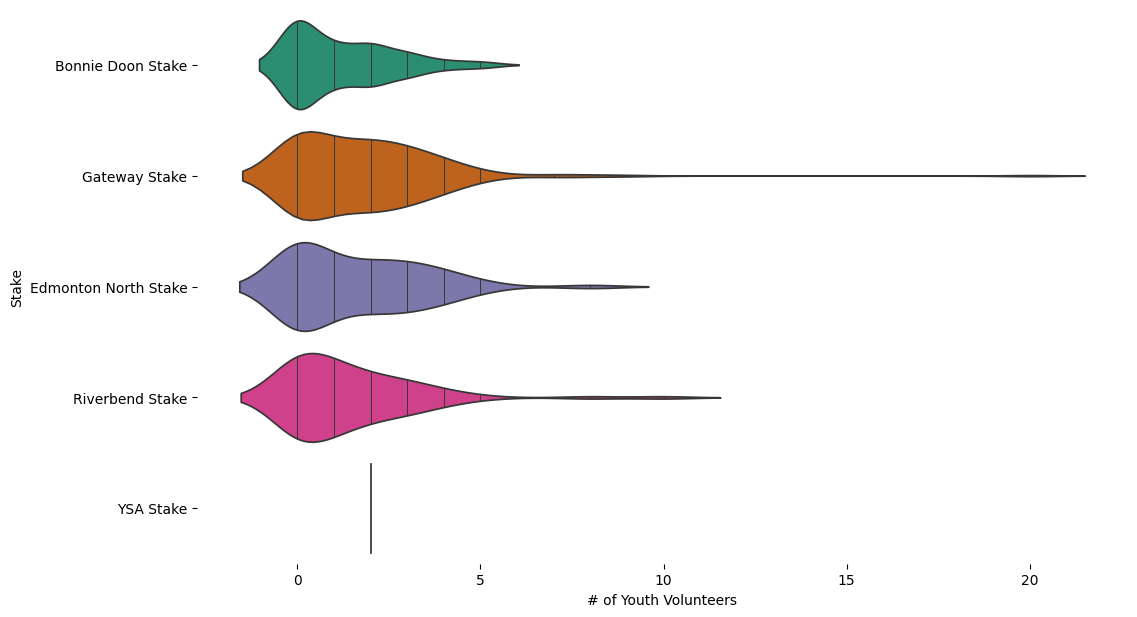

In [ ]:
# @title Stake vs # of Youth Volunteers

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Stake'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='# of Youth Volunteers', y='Stake', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

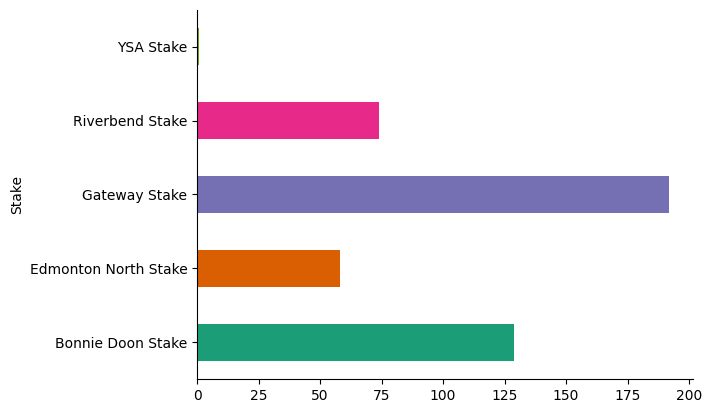

In [ ]:
# @title Stake

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Stake').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Exploratory Data Analysis

In [ ]:
data.describe()
#Download dataframe as csv file
data.to_csv('Cleaned Proposed Data Collection.csv', index=False)

In [ ]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

In [ ]:
plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

In [ ]:
plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
plt.subplot(2, 2, 4)
sns.histplot(data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()


In [ ]:
# Visualize relationships between numerical features
sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time Spent']])
plt.show()

In [ ]:
# # Visualize relationships between categorical features (if any)
# # Replace 'categorical_column' with your actual categorical column name
# if 'categorical_column' in data.columns:
#     sns.countplot(x='categorical_column', data=data)
#     plt.title('Countplot of Categorical Column')
#     plt.show()


In [ ]:
# # Correlation heatmap for numerical features
#correlation_matrix = data.corr()
#plt.figure(figsize=(8, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Correlation Heatmap')
#plt.show()


In [ ]:
# Correlation heatmap for numerical features
import numpy as np
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

# Distribution of numerical variables
numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'time completed', 'Routes Completed', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Count of categorical variables
categorical_columns = ['Location','Stake','Completed More Than One Route']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:

# Visualizations (customize as needed)
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


#AutoEDA

In [ ]:
!pip install pandas-profiling[notebook,html]

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
from ydata_profiling.utils.cache import cache_file # Use ydata_profiling instead of pandas_profiling

In [ ]:
# import pandas as pd
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file
# pandas_profiling.__version__


# Generate Report

In [ ]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

# Interview Readiness

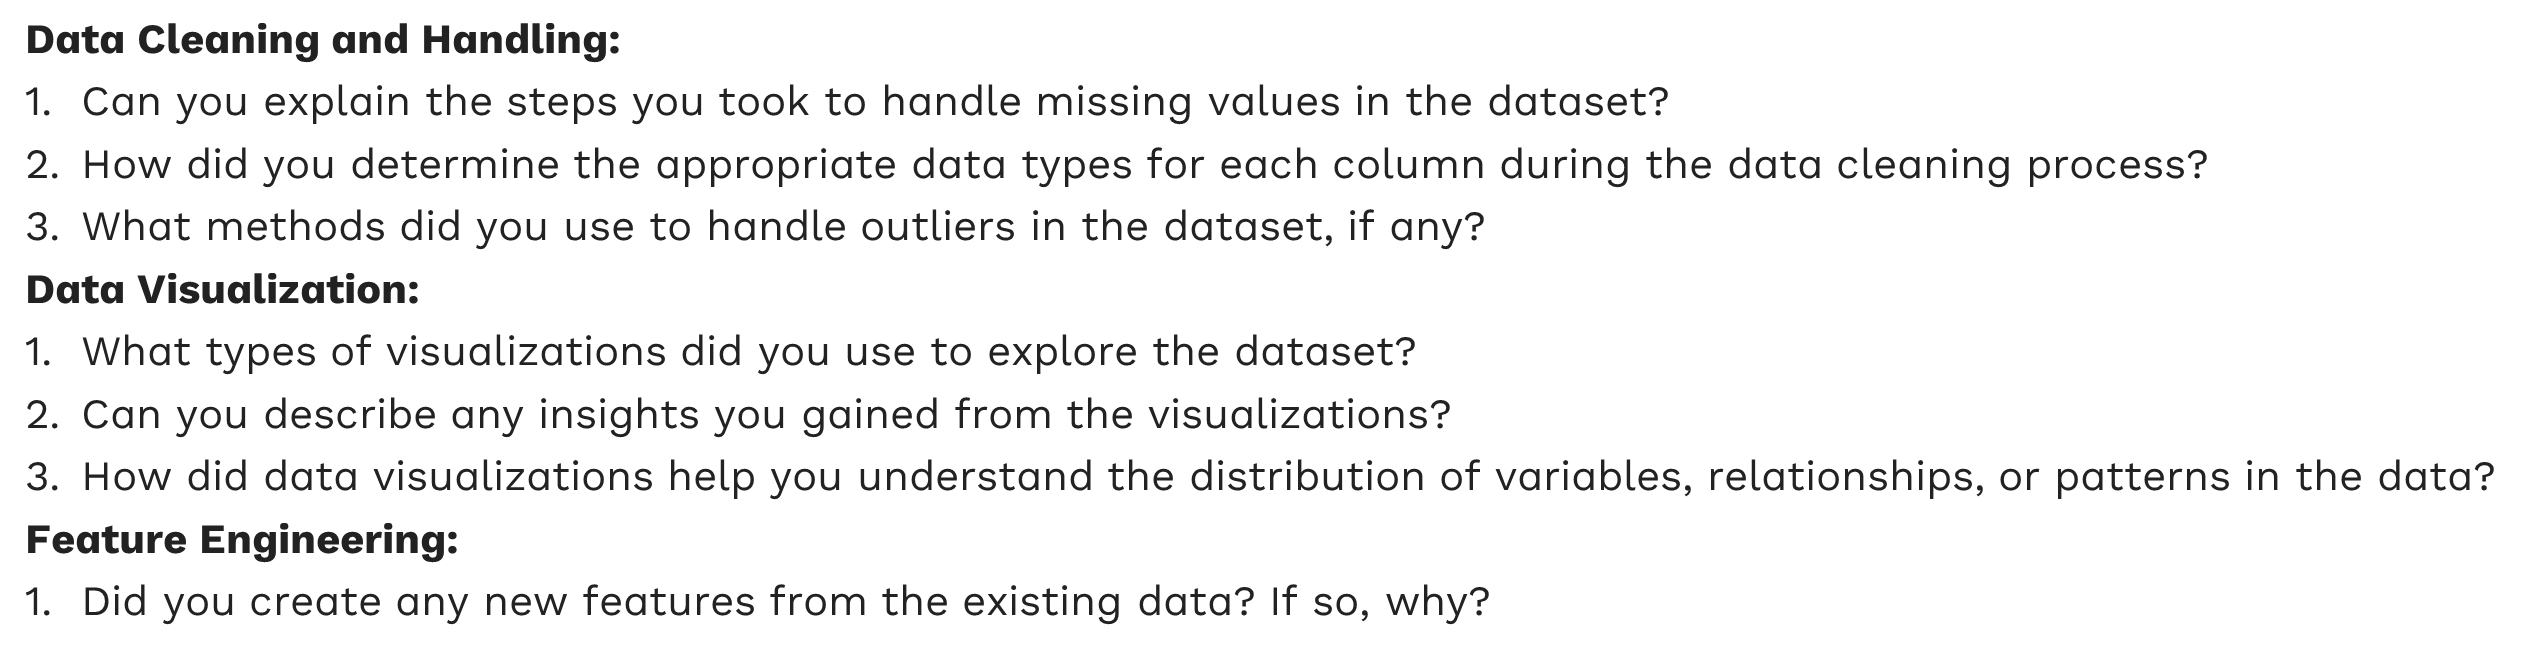

**Data cleaning and handling**

1. In order to handle the missing values in the dataset, we removed the unnecessary columns from the dataset like email, city, Ward/ Branch etc. as these columns didn't hold any value and most of them were missing. Then for the columns with missing values, we calculated their average values and replaced them. Then we also checked for the other remaining missing values.

2. In order to determine the appropriate data types for each column during the data cleaning process, we picked each column and observed which datatype would be most appropriate for it.We Converted "Number of routes completed" and "# of Doors in Route" columns to float and date to Datetime format.

3. In order to handle the outliers in the dataset, we either removed them from the dataset or replaced them with their mean.

**Data Visualization**

1. We used various visualizations to analyze the data like Histograms,Pairplots,Countplots,Barplots,Heatmaps

These visualizations provided insights into data distribution, variable relationships, and potential patterns.

2. During Last year's food drive there were about 150 volunteers who covered more than one route. Unfortunately, we don't have the route number where the volunteers had to go more than once but this year when we do have that data we can utilize more volunteers to go on the routes with most collection.
  There was more collection of donations from the southern part of the city. Amazingly where youngsters were more involved in the collection process more number of bags were collected.

3. Data visualizations are a powerful tool for interpreting variable distributions, relationships, and patterns by converting raw data into visual formats that are easier for humans to process. Here's how different visualizations were beneficial in this specific code:

- **Histograms**: Displayed the shape of the distribution for numerical variables. For example, a histogram of "Donation Bags Collected" could reveal skewness, outliers, or if the data follows a normal distribution.
  
- **Pairplots**: Facilitated the quick identification of relationships between numerical variables. A scatterplot within a pairplot could highlight a positive correlation between the number of volunteers and donation bags collected.
  
- **Countplots**: Illustrated the frequency of categories within categorical variables, exposing imbalances or revealing interesting patterns.
  
- **Barplots**: Compared the average values of numerical variables across categories of a categorical variable, such as different locations or stakes, which could show variations in donation patterns.
  
- **Heatmaps**: Visually represented the correlation matrix, helping to quickly identify strong positive or negative correlations between numerical features.

These visualizations collectively provide an intuitive understanding of the dataset, helping to identify trends, outliers, and hypotheses for deeper analysis.

** Feature Engineering**

1.No,we didn't create a new feature but we modified the feature called **"Time Spent"** because the initial column **Time Spent** had a lot of gibberish entries, so we calculated the accurate time by finding the difference between the **"The time you started at"** and **"The time you ended at"** columns. These columns represent the start and end times of each food drive route.

Creating the "Time Spent" feature is valuable because it directly measures the duration of each route. This can serve as a useful variable for further analysis. For instance, you could examine the relationship between time spent and the number of donation bags collected or explore whether certain locations or routes consistently take more time to complete, which could provide insights for optimizing future food drives.

# Other Visualizations


1. **Bar Chart for Bags Collected:**
   - Display the total number of bags collected for each region, ward, or route. This helps in comparing collection efficiency across different areas.

2. **Pie Chart for Bags Collected by Region:**
   - Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

3. **Line Chart for Time Spent:**
   - Plot the average time spent on each route over time. This chart can help identify trends in the time taken for collections.

4. **Stacked Bar Chart for Bags Collected by Ward:**
   - Display the number of bags collected in each ward, with different colors representing different routes within the ward. This helps in understanding route-wise collections within a ward.

5. **Bubble Chart for Time Spent vs. Bags Collected:**
   - Represent each route as a bubble where the X-axis is the time spent, the Y-axis is the bags collected, and the size of the bubble represents the number of collections. This chart can reveal efficiency outliers.

6. **Heatmap for Bags Collected and Time Spent:**
   - Create a heatmap where the X-axis represents time spent, the Y-axis represents routes, and the color intensity represents the number of bags collected. This visualization helps identify patterns based on both time spent and bags collected.

7. **Bar Chart for Average Time Spent by Ward:**
   - Display the average time spent on routes within each ward. This can help identify wards with particularly time-consuming routes.

8. **Box Plot for Time Spent:**
   - Use a box plot to show the distribution of time spent on different routes. This visualization provides insights into the variability in collection times.

9. **Donut Chart for Bags Collected by Route:**
   - Display the proportion of bags collected by different routes within a ward. The inner circle represents the total bags collected in the ward, and the outer ring shows the distribution by routes.

10. **Choropleth Map for Bags Collected by Region:**
    - Use a map visualization where regions are shaded based on the total bags collected. Darker shades represent higher collections, providing a geographic perspective

In [ ]:
4.# Calculate the average time spent per route for each date
avg_time_per_route = data.groupby('Date')['Time Spent'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_time_per_route['Date'], avg_time_per_route['Time Spent'])

# Customize the chart
plt.title('Average Time Spent per Route over Time')
plt.xlabel('Date')
plt.ylabel('Average Time Spent (minutes)')
plt.grid(True)
plt.xticks(rotation=45)

# Show the chart
plt.show()

In [ ]:
5.##.
!pip install plotly==5.11.0
import plotly.express as px

In [ ]:
fig = px.bar(data, x="Ward/Branch", y="Donation Bags Collected", title="Bags Collected by Ward and Branch")
fig.show()